In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        


# Any results you write to the current directory are saved as output.

/kaggle/input/classification-suv-dataset/Social_Network_Ads.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("/kaggle/input/classification-suv-dataset/Social_Network_Ads.csv")
df.head(10)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


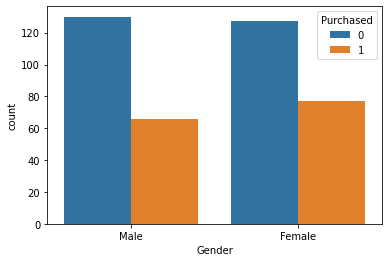

In [4]:
sns.countplot(x="Gender",hue = "Purchased",data = df)

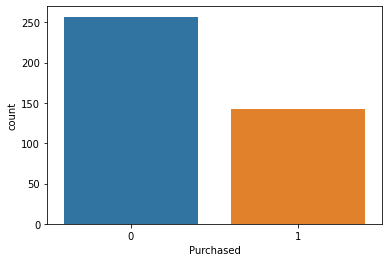

In [5]:
sns.countplot(x= "Purchased",data = df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f034dfc8be0>,
      dtype=object)

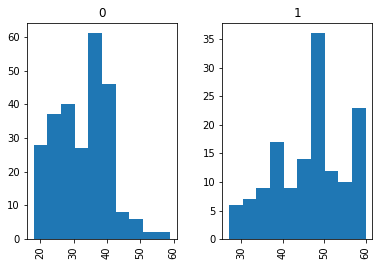

In [7]:
df['Age'].hist(by=df['Purchased'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f034dfb1d30>,
      dtype=object)

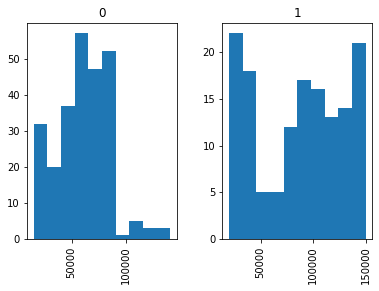

In [8]:
df["EstimatedSalary"].hist(by=df ["Purchased"])

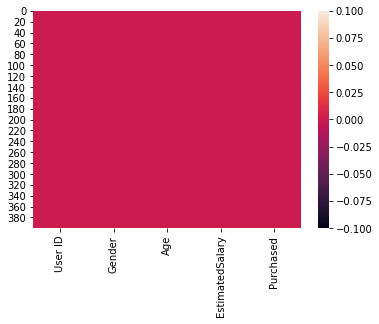

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.drop("User ID",axis = 1,inplace= True)

In [11]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [12]:
sex = pd.get_dummies(df["Gender"],drop_first=True)

In [13]:
df = pd.concat([df,sex],axis = 1)

In [14]:
df.head()

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1


In [15]:
df.drop("Gender",axis = 1,inplace = True)

In [16]:
df.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [17]:
y=df["Purchased"]
df.drop("Purchased",axis = 1,inplace = True)
X=df

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X= sc.fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [21]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)
prediction = log.predict(X_test)

In [22]:
from sklearn.metrics import classification_report
classification_report(y_test,prediction )

'              precision    recall  f1-score   support\n\n           0       0.82      0.88      0.85        72\n           1       0.79      0.71      0.75        48\n\n    accuracy                           0.81       120\n   macro avg       0.80      0.79      0.80       120\nweighted avg       0.81      0.81      0.81       120\n'

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[63,  9],
       [14, 34]])

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.8083333333333333